## 2016313844
## Jeonghoon Park

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso

In [3]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
X=california.data
DF=pd.DataFrame(X,columns=california.feature_names)
Y=california.target
print(DF)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [4]:
# We can get various regression models controlling the alpha values
ALPHA=1

rid=Ridge(alpha=ALPHA)
Model=rid.fit(X,Y)
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[ 4.36594382e-01  9.43739513e-03 -1.07132761e-01  6.44062485e-01
 -3.97034295e-06 -3.78635869e-03 -4.21299306e-01 -4.34484717e-01]
intercept
-36.93858523232896


In [5]:
ALPHA=1

las=Lasso(alpha=ALPHA)
Model=las.fit(X,Y)
print("coef")
print(Model.coef_)
print("intercept")
print(Model.intercept_)

coef
[ 1.45469232e-01  5.81496884e-03  0.00000000e+00 -0.00000000e+00
 -6.37292607e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
intercept
1.3480413673416143


In [10]:
import statsmodels.api as sm

# Define forward selection: It adds variables one by one until minimum p-value is getting bigger than cutoff-value
# We can varies the cutoff values to  control the learning.
def forward_selection(data,target,cutoff=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            #sm.OLS : statsmodel.formula.api.OLS(formula)
            #Create a model from a formula and dataframe
            #sm.add_constant : statsmodel.tools.tools.add_constant(data)
            #Add a column of ones to an array, return array_like
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# What is the mieaning of 'Y' on parameter 'target'
forwarddata=forward_selection(DF,Y,0.01)
print(forwarddata)

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


In [7]:
# Define backward elimination : It erases variables one by one from the full model, until p-value is lower than cutoff-value.
# We can varies the cutoff values to control the learning.
def backward_elimination(data, target, cutoff= 0.05):
    features = data.columns.tolist()
    while(len(features) > 0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= cutoff):
            excluded_feature=p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

backwarddata=backward_elimination(DF,Y,0.01)
print(backwarddata)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [11]:
# Define stepwise selection : It iterates with the way combining Backward and Forward selection.
def stepwise_selection(data,target,cutoff):
    initial_features = data.columns.tolist()
    best_features = []
    while(len(initial_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < cutoff):
            best_features.append(new_pval.idxmin())
            while(len(best_features) > 0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= cutoff):
                    excluded_feature=p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

stepdata=stepwise_selection(DF,Y,0.01)
print(stepdata)

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'AveOccup']


No handles with labels found to put in legend.


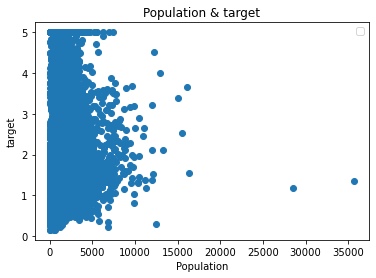

In [12]:
# Visualize the relationship with ith feature and the targer value.
i=4
plt.title(california.feature_names[i]+' & ' + 'target')
plt.xlabel(california.feature_names[i])
plt.ylabel('target')
plt.scatter(DF[california.feature_names[i]],Y)
plt.legend()
plt.show()